In [2]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [3]:
library(cowplot)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [70]:
map = read.csv('../../RecombinationMap_170802.csv') %>% 
mutate(recomb = (map_f+map_m)/2) %>%
select(c(chr, chr_pos, recomb))

colnames(map) <- c("chr", "position", "recomb")



In [71]:
summary(map)

      chr           position             recomb         
 Min.   : 1.00   Min.   :        0   Min.   :0.000e+00  
 1st Qu.: 6.00   1st Qu.: 21393283   1st Qu.:2.166e-05  
 Median :11.00   Median : 43799317   Median :1.663e-04  
 Mean   :12.54   Mean   : 49343799   Mean   :4.106e-04  
 3rd Qu.:19.00   3rd Qu.: 71485655   3rd Qu.:5.131e-04  
 Max.   :29.00   Max.   :158319652   Max.   :1.420e-02  

In [5]:
for (i in 1:30){
     assign(paste('chrom', i, sep = ""), filter(map, chr == i) %>%
            arrange(position) %>%
            mutate(bpchange = c(0,diff(position))) %>%
            mutate(mbchange = bpchange/1000000) %>%
            mutate(Genetic_Map = cumsum(50*log(1/(1-2*recomb)))) %>%
            mutate(Combined_Rate = c(0,diff(Genetic_Map))/mbchange) %>%
            select(position, Combined_Rate, Genetic_Map)
           ) 
}

In [320]:
write.table(chrom20, 'recombination.chr20.map', quote = FALSE, sep = " ", row.names = FALSE)

In [13]:
map = read.csv('../../RecombinationMap_170802.csv') %>% 
mutate(recomb = (map_f+map_m)/2) %>%
select(c(chr, chr_pos, recomb))

colnames(map) <- c("chr", "position", "recomb")

In [14]:
whole = map %>% arrange(chr, position) %>% mutate(bpchange = c(0,diff(position))) %>% mutate(mbchange = bpchange/1000000) %>% mutate(Genetic_Map = cumsum(50*log(1/(1-2*recomb)))) %>%  mutate(Combined_Rate = c(0,diff(Genetic_Map))/mbchange)

In [15]:
mean(whole$Combined_Rate, na.rm = TRUE)

[1] 140.1893

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 234 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

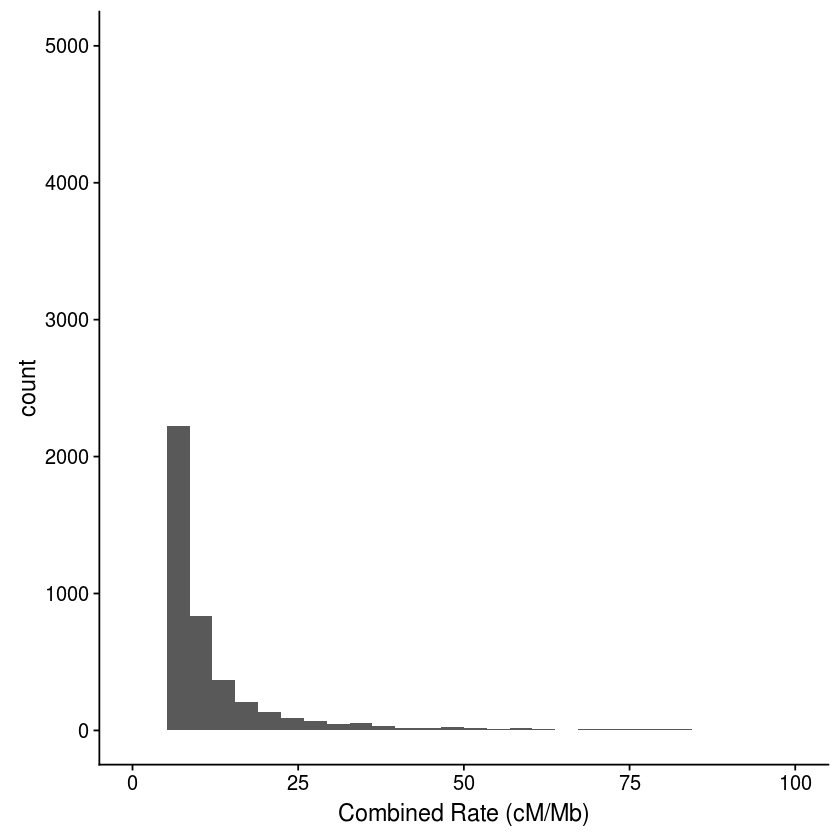

In [310]:
ggplot(whole, aes(Combined_Rate))+
geom_histogram()+
xlim(0, 100)+
xlab("Combined Rate (cM/Mb)")+
ylim(0,5000)

# Using USDA Created Map
##### See if I can detect any differences between the two

In [23]:
map = read.delim('./cattle_rmap.txt', sep= ' ') %>% 
mutate(recomb = (map_f+map_m)/2) %>%
select(c(Chr, Location, recomb))

colnames(map) <- c("chr", "position", "recomb")

In [31]:
for (i in 1:30){
     assign(paste('chrom', i, sep = ""), filter(map, chr == i) %>%
            arrange(position) %>%
            mutate(bpchange = c(0,diff(position))) %>%
            mutate(mbchange = bpchange/1000000) %>%
            mutate(Genetic_Map = cumsum(50*log(1/(1-2*recomb)))) %>%
            mutate(Combined_Rate = c(0,diff(Genetic_Map))/mbchange) %>%
            select(position, Combined_Rate, Genetic_Map)
           ) 
}

In [65]:
summary(chrom17$Combined_Rate)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    0.00     0.06     0.48    44.78     1.58 80670.00        1 

[[1]]
[1] "chrom1"

[[2]]
[1] "chrom2"

[[3]]
[1] "chrom3"

[[4]]
[1] "chrom4"

[[5]]
[1] "chrom5"

[[6]]
[1] "chrom6"

[[7]]
[1] "chrom7"

[[8]]
[1] "chrom8"

[[9]]
[1] "chrom9"

[[10]]
[1] "chrom10"

[[11]]
[1] "chrom11"

[[12]]
[1] "chrom12"

[[13]]
[1] "chrom13"

[[14]]
[1] "chrom14"

[[15]]
[1] "chrom15"

[[16]]
[1] "chrom16"

[[17]]
[1] "chrom17"

[[18]]
[1] "chrom18"

[[19]]
[1] "chrom19"

[[20]]
[1] "chrom20"

[[21]]
[1] "chrom21"

[[22]]
[1] "chrom22"

[[23]]
[1] "chrom23"

[[24]]
[1] "chrom24"

[[25]]
[1] "chrom25"

[[26]]
[1] "chrom26"

[[27]]
[1] "chrom27"

[[28]]
[1] "chrom28"

[[29]]
[1] "chrom29"

[[30]]
[1] "chrom30"